In [1]:
#Import required libraries 
#The requests library will make a GET request to a web server, which will download the HTML contents of a given web page for us.

import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import pycountry as pc

# use the inline backend to generate the plots within the browser
%matplotlib inline 

plt.style.use('ggplot')  # optional: for ggplot-like style

In [2]:
#function that turn column names to snakecase as to make it easier to work with.
def to_snakecase (cols):
  map_dict = {}
  for col in cols:
    map_dict[col] = col.lower().strip().replace(' ', '_')
  return map_dict

In [3]:
#To deal with the different country names, we'll define a function that will map them to the same format across both datasets using the Pycountry library.
def normalize_country (data):
  if pc.countries.get(official_name=data):
    return pc.countries.get(official_name=data).name
  elif pc.countries.get(name=data):
    return pc.countries.get(name=data).name
  elif pc.countries.get(alpha_3=data):
    return pc.countries.get(alpha_3=data).name
  elif pc.countries.get(alpha_2=data):
    return pc.countries.get(alpha_2=data).name

<h3>Web Scraping</h3>

Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites.

In [4]:
#Downloading the Webpage
page = requests.get("https://www.worldometers.info/coronavirus")

page.status_code
#  A status_code of 200 means that the page downloaded successfully. A status code starting with a 2 generally indicates success

200

In [ ]:
#display page content
page.content

<h3> HTML Parsing </h3>
<p>Parsing simply means breaking up sentence structure into components under the direction of grammar. So, ‘HTML parsing’ means taking in HTML code and extracting relevant information from its various tags. . We will be using ‘BeautifulSoup’ library.

Here, the ‘lxml’ parser was used since it works with broken html and widely used.</p>

In [ ]:
#Initiating the BeautifulSoup Class
#Where soup is a variable containing the HTML of the webpage
soup = BeautifulSoup(page.content, 'lxml')

#Lets format it nicely, using the prettify method
print(soup.prettify())

<h3>Extraction of Table</h3>
<p>"table id="main_table_countries_today" class="table table-bordered table-hover main_table_countries dataTable no-footer" style="width: 100%; margin-top: 0px !important;"</p>

Succeeding the inspection, the attributes — ‘id’ was identified and will be use to filter the HTML document to get the required table elements.

In [ ]:
table = soup.find('table', attrs={'id' : "main_table_countries_today"})
table

In [9]:
rows = table.find_all("tr", attrs={"style": ""})

#create a list from the data in the table
data = []
for i,item in enumerate(rows):
    
    if i == 0:
        
        data.append(item.text.strip().split("\n")[:13])
        
    else:
        data.append(item.text.strip().split("\n")[:12])

In [10]:
#Create a pandas dataframe from the data obtained
df = pd.DataFrame(data)
df = pd.DataFrame(data[1:], columns=data[0][:12]) #Formatting the header
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
0,World,"335,801,588","+610,752","5,575,702","+2,662","271,471,105","+516,001","58,754,781","96,411","43,080",715.3,
1,1,USA,"68,767,004",,"877,240",,"43,528,110",,"24,361,654","25,810","205,887","2,626"
2,2,India,"37,901,241",,"487,226",,"35,583,039",,"1,830,976","8,944","27,053",348
3,3,Brazil,"23,215,551",,"621,578",,"21,773,085",,"820,888","8,318","108,032","2,892"
4,4,UK,"15,399,300",,"152,513",,"11,617,031",,"3,629,756",713,"225,013","2,229"
...,...,...,...,...,...,...,...,...,...,...,...,...
213,215,Vatican City,29,,,,27,,2,,"36,070",
214,216,Western Sahara,10,,1,,8,,1,,16,2
215,219,Marshall Islands,7,,,,4,,3,,117,
216,224,China,"105,345",+87,"4,636",,"97,255",+163,"3,454",15,73,3


In [11]:
#to get the coordinates of the country to the data on a worldmap
page_c = requests.get("https://developers.google.com/public-data/docs/canonical/countries_csv")
page_c.status_code

200

In [ ]:
#Initiating the BeautifulSoup Class
soup_c = BeautifulSoup(page_c.content, 'lxml')
print(soup_c.prettify())

In [ ]:
table_c = soup_c.find('table')
table_c

In [14]:
rows_c = table_c.find_all("tr", attrs={"style": ""})
#create a list from the data in the table
data_c = []
for i,item in enumerate(rows_c):
    
    if i == 0:
        
        data_c.append(item.text.strip().split("\n")[:13])
        
    else:
        data_c.append(item.text.strip().split("\n")[:12])

#dataframe for coordiantes from the data obtained from the table
df_c = pd.DataFrame(data_c)
df_c = pd.DataFrame(data_c[1:], columns=data_c[0][:12]) #Formatting the header
df_c

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.93911,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.8275,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


### Data Wrangling

In [15]:
#coordinate dataframe: rename the column name to Country  

df_c.drop('name', axis= 1, inplace=True)
df_c.rename(to_snakecase(df.columns), axis=1, inplace=True)
df_c.country = df_c.country.apply(normalize_country)

cols2 = df_c.columns.drop('country')
df_c[cols2] = df_c[cols2].apply(pd.to_numeric, errors='coerce')
df_c.head()

,country,latitude,longitude
0,Andorra,42.546245,1.601554
1,United Arab Emirates,23.424076,53.847818
2,Afghanistan,33.939110,67.709953
3,Antigua and Barbuda,17.060816,-61.796428
4,Anguilla,18.220554,-63.068615


In [16]:
#drop the rows and coloumns that is not required
df.drop([0, 217], axis= 0, inplace=True)
df.drop('#', axis= 1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(216, 11)

In [17]:

df.rename(columns={'Country,Other':'Country'}, inplace= True)
df.rename(to_snakecase(df.columns), axis=1, inplace=True)
df.country = df.country.apply(normalize_country)
df

,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,"serious,critical",tot cases/1m_pop,deaths/1m_pop
0,United States,"68,767,004",,"877,240",,"43,528,110",,"24,361,654","25,810","205,887","2,626"
1,India,"37,901,241",,"487,226",,"35,583,039",,"1,830,976","8,944","27,053",348
2,Brazil,"23,215,551",,"621,578",,"21,773,085",,"820,888","8,318","108,032","2,892"
3,None,"15,399,300",,"152,513",,"11,617,031",,"3,629,756",713,"225,013","2,229"
4,France,"14,739,297",,"127,638",,"9,612,962","+205,868","4,998,697","3,881","225,038","1,949"
...,...,...,...,...,...,...,...,...,...,...,...
211,Solomon Islands,32,,,,20,,12,,45,
212,None,29,,,,27,,2,,"36,070",
213,Western Sahara,10,,1,,8,,1,,16,2
214,Marshall Islands,7,,,,4,,3,,117,


In [18]:
# checking the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           187 non-null    object
 1   totalcases        216 non-null    object
 2   newcases          216 non-null    object
 3   totaldeaths       216 non-null    object
 4   newdeaths         216 non-null    object
 5   totalrecovered    216 non-null    object
 6   newrecovered      216 non-null    object
 7   activecases       216 non-null    object
 8   serious,critical  216 non-null    object
 9   tot cases/1m_pop  216 non-null    object
 10  deaths/1m_pop     216 non-null    object
dtypes: object(11)
memory usage: 18.7+ KB


In [19]:
#change the data type into int/float for further use
df = df.replace(',','', regex=True)

cols1 = df.columns.drop('country')
df[cols1] = df[cols1].apply(pd.to_numeric, errors='coerce')
df.dtypes


country              object
totalcases            int64
newcases            float64
totaldeaths         float64
newdeaths           float64
totalrecovered      float64
newrecovered        float64
activecases         float64
serious,critical    float64
tot cases/1m_pop      int64
deaths/1m_pop       float64
dtype: object

### EDA

In [20]:
# df_can datafram from df for data visualization
#  sort dataframe on 'Total' column (descending)
# get top 15 countries data as df_top15

df_can = df.set_index('country')
df_can.sort_values(by='totalcases', ascending=True, inplace=True)
df_top15 = df_can['totalcases'].tail(15)
df_top15

country
Poland            4373718
Mexico            4434758
Colombia          5596917
NaN               6231909
Argentina         7318305
Germany           8140446
Spain             8518975
Italy             9018425
Turkey           10591757
NaN              10899411
France           14739297
NaN              15399300
Brazil           23215551
India            37901241
United States    68767004
Name: totalcases, dtype: int64

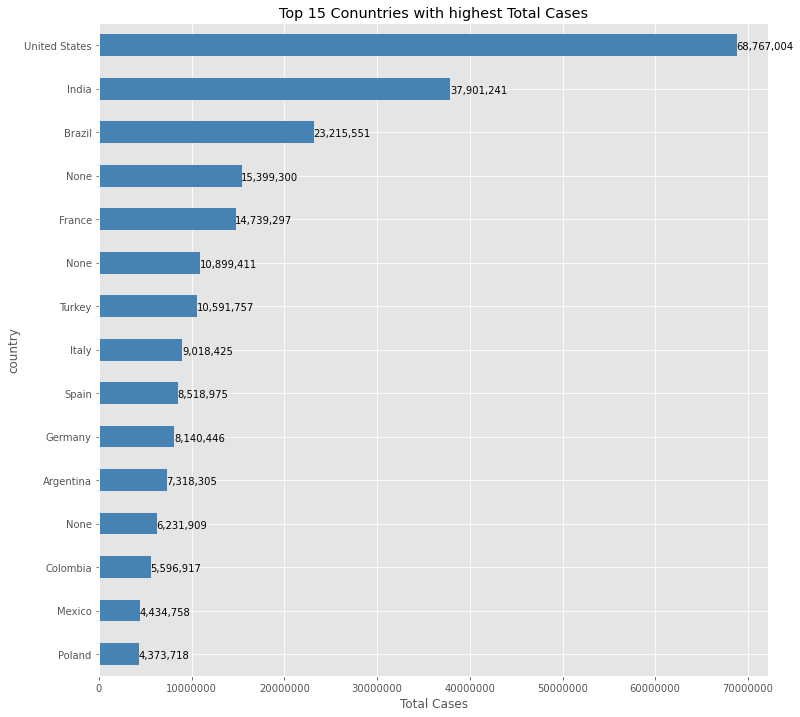

In [24]:
# generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Total Cases')
plt.title('Top 15 Conuntries with highest Total Cases')
plt.ticklabel_format(style='plain', axis='x')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas

    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='black')

plt.show()

In [25]:
#new dataframe corona from "country", "totalcases" columns in dataframe df
corona =  df[["country", "totalcases"]]
corona.head()

,country,totalcases
0,United States,68767004
1,India,37901241
2,Brazil,23215551
3,None,15399300
4,France,14739297


In [26]:
#new dataframe with coordinates data from df_csv dataframe
coordinates=  df_c[["latitude", "longitude", "country"]]
coordinates.head()

,latitude,longitude,country
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla


In [27]:
#the dataframes with data over covid and coordinates is merged
data = pd.merge(left=corona, right=coordinates, on='country')
data = data[data.country.notnull()].reset_index(drop=True)
data.head()

,country,totalcases,latitude,longitude
0,United States,68767004,37.090240,-95.712891
1,India,37901241,20.593684,78.962880
2,Brazil,23215551,-14.235004,-51.925280
3,France,14739297,46.227638,2.213749
4,Turkey,10591757,38.963745,35.243322


In [28]:
#As some values in the data is too high compared to the others, all the scatter points wont be visible
#therefore a new coloumn is calculated so that the data can be visualized better
data['totalcases_norm'] = 17 + np.log(data['totalcases']/data['totalcases'].max())
data['totalcases_norm'] = np.power(data['totalcases_norm'], 3)

In [29]:
#create a worldmap visualtization of totalcases with mapbox and plotly scatter plot
#The access token is obtained from your mapbox personal account

px.set_mapbox_access_token("pk.eyJ1IjoiemplcmluamFtZXMiLCJhIjoiY2t5ZXBkcjZ5MDUzYTJwcXJsYTNlbTd6cCJ9.nCIbtyTk_ACADOUYS4KpMQ")
fig = px.scatter_mapbox(data, lat="latitude", lon="longitude",color="totalcases", size="totalcases_norm",
                  color_continuous_scale=px.colors.sequential.Rainbow, size_max=10,zoom=0, hover_name="country", hover_data= {"totalcases":True,"longitude":False, "latitude":False, "totalcases_norm" :False})

fig.show()

From the world map we can easily observe the total Covid-19 cases of each country.